# Top

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Standard
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime

# Custom
import finance_utils as fu
import stock_db_mgr as sdm

In [3]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

In [4]:
# Set seaborn plot theme:
sns.set_theme()

# Top Performer Strategy

* Make sure TSX symbol list are up to date
* Download all TSX data
* Create DB on TSX
* Get close price on all symbols
* Remove symbols that don't have valid last date data
* Keep symbols with sufficient data
* Fill NaN data

## DB creation

In [5]:
db = sdm.StockDBMgr('stock_db/tsx')

## Get close price

In [6]:
dfa = db.get_all_symbol_single_data_item('Close')

In [7]:
dfa.describe()

Close,ABX.TO,AC.TO,ACB.TO,ACO-X.TO,AEM.TO,AGI.TO,AIF.TO,ALA.TO,AP-UN.TO,AQN.TO,...,WELL.TO,WFG.TO,WN.TO,WPK.TO,WPM.TO,WPRT.TO,WSP.TO,WTE.TO,X.TO,ZZZ.TO
count,7138.000000,3308.000000,1674.000000,7140.000000,7138.000000,4937.000000,3732.000000,4785.000000,3731.000000,4937.000000,...,2611.000000,9444.000000,7139.000000,6738.000000,4648.000000,5940.000000,2364.000000,4936.000000,4943.000000,1981.000000
mean,24.030829,15.145792,42.990723,19.662581,34.692305,8.957930,23.843077,17.402545,25.554138,7.152890,...,1.837354,26.344961,66.901543,18.433556,25.327680,124.708764,78.253464,13.716623,52.618852,23.339894
std,7.251666,11.755490,46.826285,13.830196,22.358464,3.973398,17.914958,5.821715,10.626575,5.115239,...,2.530620,27.495072,34.400405,16.270674,15.717717,131.053068,48.530345,7.555082,38.429594,6.387706
min,7.048787,0.820000,0.670000,1.694719,3.492450,1.511481,1.959305,6.364613,5.155543,0.862284,...,0.005000,3.245269,8.283880,1.885874,2.610562,9.100000,24.834864,1.949556,7.831963,7.746731
25%,19.029768,3.507500,8.217500,6.531371,13.951282,6.090380,7.352969,12.825051,16.752945,3.356123,...,0.125000,9.506346,44.650126,5.453176,13.099431,35.000000,37.247991,5.998256,25.135365,18.072636
50%,22.921084,13.210000,24.540000,16.278467,31.920109,8.499855,18.499906,16.678467,25.685293,4.523166,...,0.400000,13.989386,62.840157,8.592533,23.029654,63.700001,62.725487,14.327959,37.364990,24.123781
75%,28.019450,23.150000,84.539999,33.793501,51.861281,11.372249,35.143688,21.873940,33.753011,10.262304,...,3.110000,38.867781,91.086151,38.481154,31.734182,180.424995,116.459379,18.954086,69.419968,28.028477
max,45.278152,52.090000,180.839996,47.128162,105.389008,18.822880,70.733627,32.215015,51.148510,19.892902,...,9.230000,129.079971,182.360001,55.874836,72.176750,805.000000,184.970398,35.544533,149.570007,38.630478


## Last date cleanup

<Axes: xlabel='Date'>

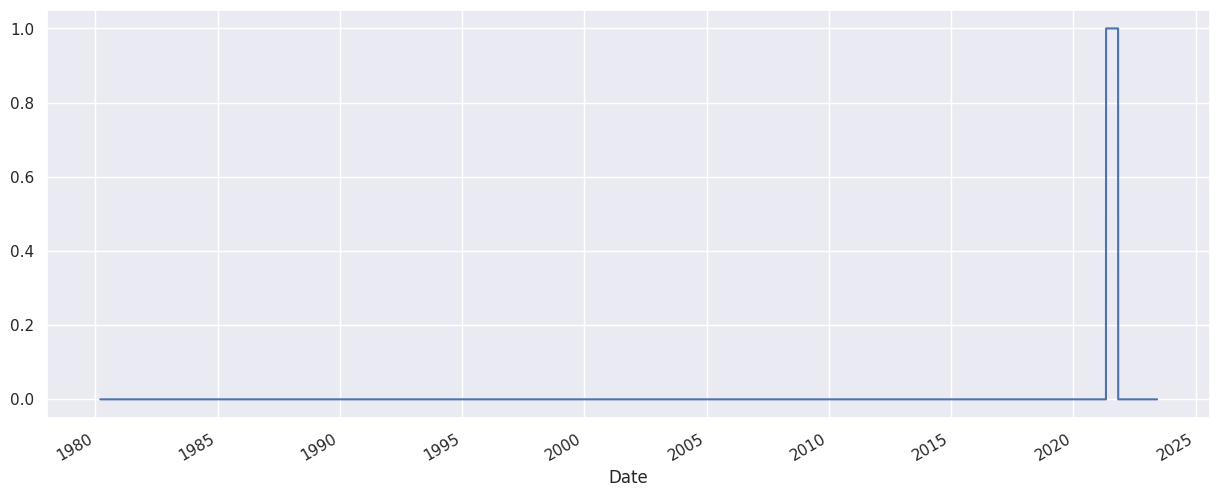

In [8]:
# When do we have all valid data for all symbols?
dfa.notna().all(1).mul(1).plot()

In [9]:
# Which symbols have last valid data
dfa.columns[dfa.iloc[-1].notna()]

Index(['ABX.TO', 'AC.TO', 'ACB.TO', 'ACO-X.TO', 'AEM.TO', 'AGI.TO', 'AIF.TO',
       'ALA.TO', 'AP-UN.TO', 'AQN.TO',
       ...
       'WELL.TO', 'WFG.TO', 'WN.TO', 'WPK.TO', 'WPM.TO', 'WPRT.TO', 'WSP.TO',
       'WTE.TO', 'X.TO', 'ZZZ.TO'],
      dtype='object', name='Close', length=221)

In [10]:
# remove symbols with invalid data on last date
dfa = dfa[dfa.columns[dfa.iloc[-1].notna()]]

In [11]:
dfa.describe()

Close,ABX.TO,AC.TO,ACB.TO,ACO-X.TO,AEM.TO,AGI.TO,AIF.TO,ALA.TO,AP-UN.TO,AQN.TO,...,WELL.TO,WFG.TO,WN.TO,WPK.TO,WPM.TO,WPRT.TO,WSP.TO,WTE.TO,X.TO,ZZZ.TO
count,7138.000000,3308.000000,1674.000000,7140.000000,7138.000000,4937.000000,3732.000000,4785.000000,3731.000000,4937.000000,...,2611.000000,9444.000000,7139.000000,6738.000000,4648.000000,5940.000000,2364.000000,4936.000000,4943.000000,1981.000000
mean,24.030829,15.145792,42.990723,19.662581,34.692305,8.957930,23.843077,17.402545,25.554138,7.152890,...,1.837354,26.344961,66.901543,18.433556,25.327680,124.708764,78.253464,13.716623,52.618852,23.339894
std,7.251666,11.755490,46.826285,13.830196,22.358464,3.973398,17.914958,5.821715,10.626575,5.115239,...,2.530620,27.495072,34.400405,16.270674,15.717717,131.053068,48.530345,7.555082,38.429594,6.387706
min,7.048787,0.820000,0.670000,1.694719,3.492450,1.511481,1.959305,6.364613,5.155543,0.862284,...,0.005000,3.245269,8.283880,1.885874,2.610562,9.100000,24.834864,1.949556,7.831963,7.746731
25%,19.029768,3.507500,8.217500,6.531371,13.951282,6.090380,7.352969,12.825051,16.752945,3.356123,...,0.125000,9.506346,44.650126,5.453176,13.099431,35.000000,37.247991,5.998256,25.135365,18.072636
50%,22.921084,13.210000,24.540000,16.278467,31.920109,8.499855,18.499906,16.678467,25.685293,4.523166,...,0.400000,13.989386,62.840157,8.592533,23.029654,63.700001,62.725487,14.327959,37.364990,24.123781
75%,28.019450,23.150000,84.539999,33.793501,51.861281,11.372249,35.143688,21.873940,33.753011,10.262304,...,3.110000,38.867781,91.086151,38.481154,31.734182,180.424995,116.459379,18.954086,69.419968,28.028477
max,45.278152,52.090000,180.839996,47.128162,105.389008,18.822880,70.733627,32.215015,51.148510,19.892902,...,9.230000,129.079971,182.360001,55.874836,72.176750,805.000000,184.970398,35.544533,149.570007,38.630478


<Axes: xlabel='Date'>

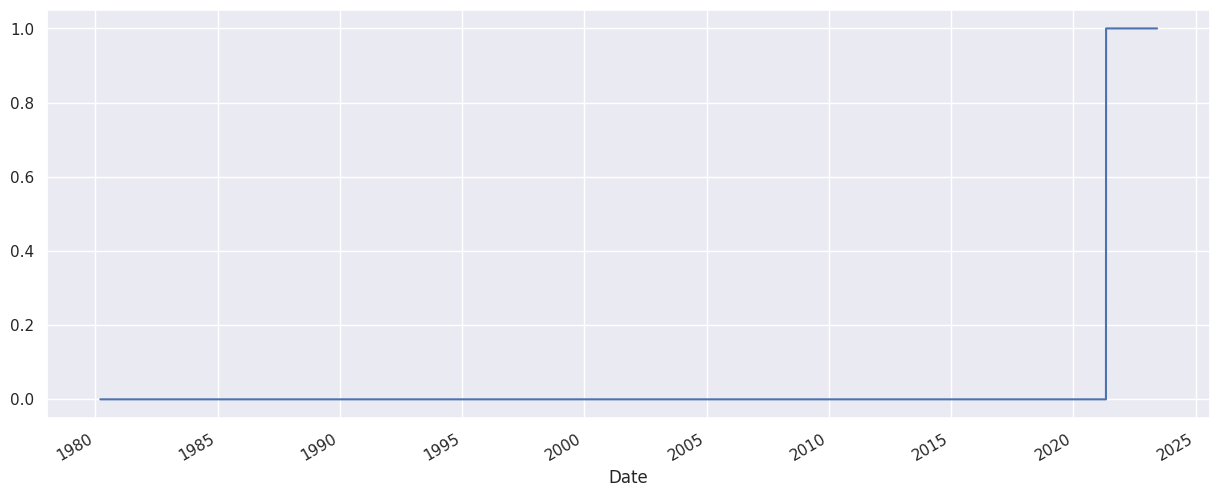

In [12]:
# Confirm all good
dfa.notna().all(1).mul(1).plot()

## Keep symbols with sufficient data

In [13]:
# First date when all valid
dfa[dfa.notna().all(1)].iloc[0].name

Timestamp('2021-05-05 00:00:00')

In [14]:
# How many stocks have valid data for more than 10 years.
# About 253 trading days per year.
(dfa.notna().mul(1).sum().sort_values().div(253) > 10).mul(1).sum()

183

In [15]:
t = dfa.notna().mul(1).sum().div(253) > 10
t

Close
ABX.TO       True
AC.TO        True
ACB.TO      False
ACO-X.TO     True
AEM.TO       True
            ...  
WPRT.TO      True
WSP.TO      False
WTE.TO       True
X.TO         True
ZZZ.TO      False
Length: 221, dtype: bool

In [16]:
t = list(t[t].index)
t

['ABX.TO',
 'AC.TO',
 'ACO-X.TO',
 'AEM.TO',
 'AGI.TO',
 'AIF.TO',
 'ALA.TO',
 'AP-UN.TO',
 'AQN.TO',
 'ARE.TO',
 'ARX.TO',
 'ATD.TO',
 'AX-UN.TO',
 'BB.TO',
 'BBD-B.TO',
 'BCE.TO',
 'BDGI.TO',
 'BEI-UN.TO',
 'BEP-UN.TO',
 'BHC.TO',
 'BIP-UN.TO',
 'BIR.TO',
 'BLDP.TO',
 'BLX.TO',
 'BMO.TO',
 'BNS.TO',
 'BTO.TO',
 'BYD.TO',
 'CAE.TO',
 'CAR-UN.TO',
 'CAS.TO',
 'CCA.TO',
 'CCL-B.TO',
 'CCO.TO',
 'CF.TO',
 'CFP.TO',
 'CG.TO',
 'CIGI.TO',
 'CIX.TO',
 'CJR-B.TO',
 'CJT.TO',
 'CLS.TO',
 'CM.TO',
 'CNQ.TO',
 'CNR.TO',
 'CP.TO',
 'CPG.TO',
 'CPX.TO',
 'CRR-UN.TO',
 'CS.TO',
 'CSH-UN.TO',
 'CSU.TO',
 'CTC-A.TO',
 'CU.TO',
 'CVE.TO',
 'CWB.TO',
 'D-UN.TO',
 'DML.TO',
 'DOL.TO',
 'DPM.TO',
 'DSG.TO',
 'EDR.TO',
 'EFN.TO',
 'EIF.TO',
 'ELD.TO',
 'EMA.TO',
 'EMP-A.TO',
 'ENB.TO',
 'ENGH.TO',
 'EQB.TO',
 'ERF.TO',
 'FCR-UN.TO',
 'FFH.TO',
 'FM.TO',
 'FNV.TO',
 'FR.TO',
 'FTS.TO',
 'FTT.TO',
 'FVI.TO',
 'GEI.TO',
 'GIB-A.TO',
 'GIL.TO',
 'GRT-UN.TO',
 'GSY.TO',
 'GWO.TO',
 'HBM.TO',
 'HCG.TO',
 'HR-U

<Axes: xlabel='Date'>

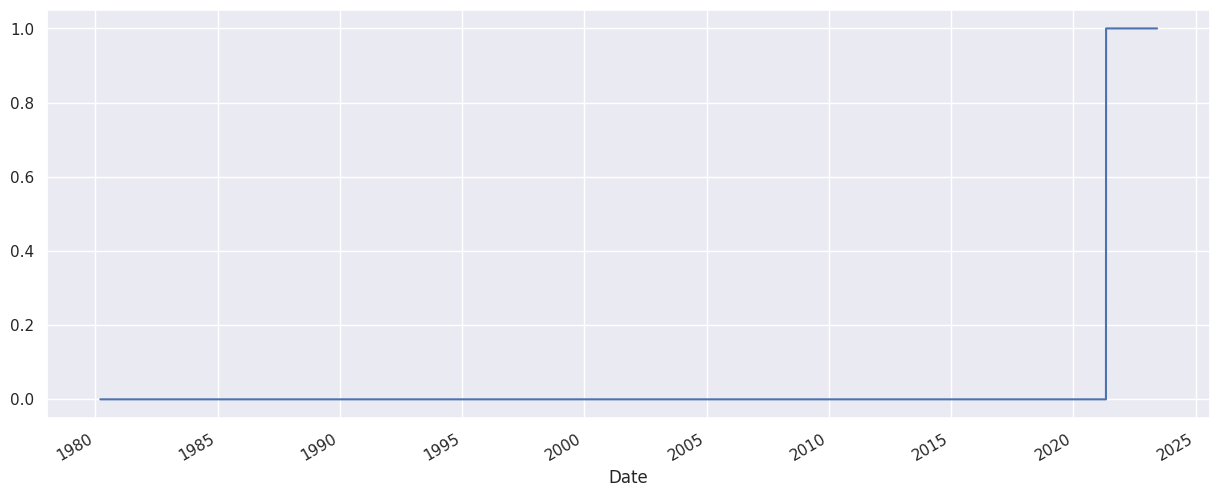

In [17]:
dfa.notna().all(1).mul(1).plot()

<Axes: xlabel='Date'>

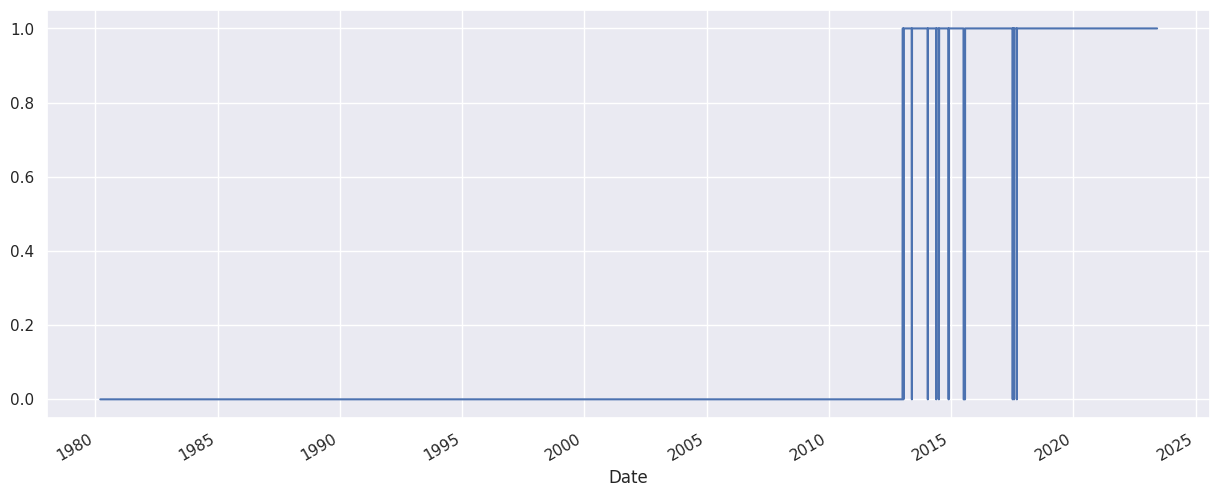

In [18]:
dfa[t].notna().all(1).mul(1).plot()

<Axes: xlabel='Date'>

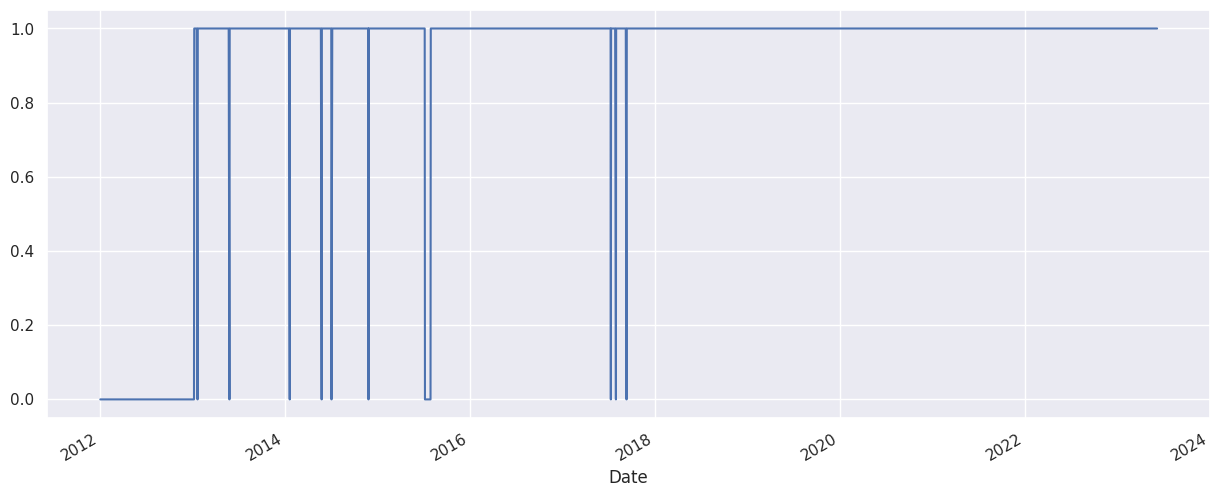

In [19]:
dfa[t].notna().all(1).mul(1)['2012-01-01':].plot()

In [20]:
dfa[dfa[t].notna().all(1)].iloc[0].name

Timestamp('2013-01-08 00:00:00')

In [21]:
# From valid date
dfv = dfa[t].loc[_ : ]

## Fill NaN data

In [22]:
dfv = fu.fill_nan_data(dfv)

In [23]:
dfv.notna().all(0).all()

True

# Analysis parameters

In [24]:
# parameters
# i: start day
# d: duration increment
i = 0
d = 253 # About 253 trading days per year

In [25]:
# Nb of symbols
n = len(dfv.columns)

In [26]:
# Nb of best symbols to keep
k = 5

In [27]:
dfv.iloc[i : i + d]

Close,ABX.TO,AC.TO,ACO-X.TO,AEM.TO,AGI.TO,AIF.TO,ALA.TO,AP-UN.TO,AQN.TO,ARE.TO,...,WDO.TO,WEED.TO,WELL.TO,WFG.TO,WN.TO,WPK.TO,WPM.TO,WPRT.TO,WTE.TO,X.TO
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-08,27.964243,1.99,28.876032,41.463142,14.989528,6.616485,19.123066,21.206135,4.369480,8.000710,...,0.85,0.25,0.14,34.841347,56.511395,12.338365,30.036758,270.600006,17.871071,38.023548
2013-01-09,28.014874,2.14,29.079878,41.387501,15.098672,6.608607,19.002783,21.141193,4.393891,7.958377,...,0.87,0.25,0.13,34.768631,57.079647,12.271806,30.097071,280.500000,17.631447,38.210861
2013-01-10,28.647743,2.12,28.861721,41.958931,15.617122,6.695251,19.088696,21.225611,4.430506,8.064208,...,0.87,0.25,0.13,34.764069,57.779667,12.271806,30.855307,275.100006,17.675591,38.210861
2013-01-11,28.453671,2.09,29.205059,42.152218,15.389733,6.616485,19.168879,21.498405,4.461019,7.986597,...,0.89,0.25,0.13,34.600464,57.960842,12.230209,30.812225,276.200012,17.574696,38.855186
2013-01-14,28.411470,2.15,29.487589,41.942131,13.552422,6.640116,19.123066,21.953049,4.461019,7.887824,...,0.88,0.25,0.13,34.818611,57.960842,12.196927,30.803612,270.200012,17.637756,38.862690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-03,16.831673,7.50,33.745365,24.887463,12.212243,13.927230,24.261343,22.248886,4.546278,11.542318,...,0.63,0.05,0.22,47.179138,64.737289,18.687403,19.713619,208.600006,23.112209,39.707024
2014-01-06,17.067011,7.39,33.556320,25.198448,12.110705,13.960571,24.309067,22.485867,4.616615,11.636330,...,0.61,0.05,0.22,47.403202,64.568314,18.628819,19.976824,215.600006,23.039724,39.892609
2014-01-07,17.145470,7.36,34.021667,25.371220,12.193782,13.993912,24.297131,22.594200,4.699738,11.715882,...,0.64,0.05,0.22,47.787338,65.049843,18.620451,20.099646,225.600006,23.145155,39.776630


## Return for all - current period

In [28]:
fu.normalize_data_frame(dfv.iloc[i : i + d]).iloc[-1].div(n).sum() - 1

0.18072875459145576

## Find best performing stocks

In [29]:
b = fu.normalize_data_frame(dfv.iloc[i : i + d]).iloc[-1].sub(1).sort_values(ascending=False).iloc[:k]
b

Close
AC.TO      2.994975
BLDP.TO    2.373134
BDGI.TO    2.136735
BHC.TO     1.331979
AIF.TO     1.128863
Name: 2014-01-09 00:00:00, dtype: float64

## Return for best - current period

In [30]:
fu.normalize_data_frame(dfv[b.index].iloc[i : i + d]).iloc[-1].div(k).sum() - 1

1.993137178414265

## Return for all - next period

In [31]:
fu.normalize_data_frame(dfv.iloc[i + d : i + 2 * d]).iloc[-1].div(n).sum() - 1

0.35635930612369027

## Return for best - next period

In [32]:
fu.normalize_data_frame(dfv[b.index].iloc[i + d : i + 2 * d]).iloc[-1].div(k).sum() - 1

0.10175603602932415

In [ ]:
# ... oops...

# need to try other time period, other duration...